Lab 4: Working with 'real' data

In this lab, we are going to work with data that have some features that resemble that of real data sets and we will practice how to estimate the background from those data. 

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [8]:
hf = h5py.File('gammaray_lab4.h5', 'r')
data = np.array(hf.get('data'))
hf.close()

Problem 1

Now let's see the data from a gamma-ray satellite orbiting in low Earth orbit, which is an approximately 90 minute orbit. It takes a reading of the number of particles detected every 100 milliseconds. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays. 

Problem 1. 1)

Now, let's plot our data and explore it. We will try to understand the content and give a high level description of the data features. Specifically, we will be lookig for signal contamination and deciding how to build the background probability density function, pdf().

Our data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. In order to make our plots clear to observe, we will choose to plot the first 200000 rows of our data.

Text(0.5, 0, 'time')

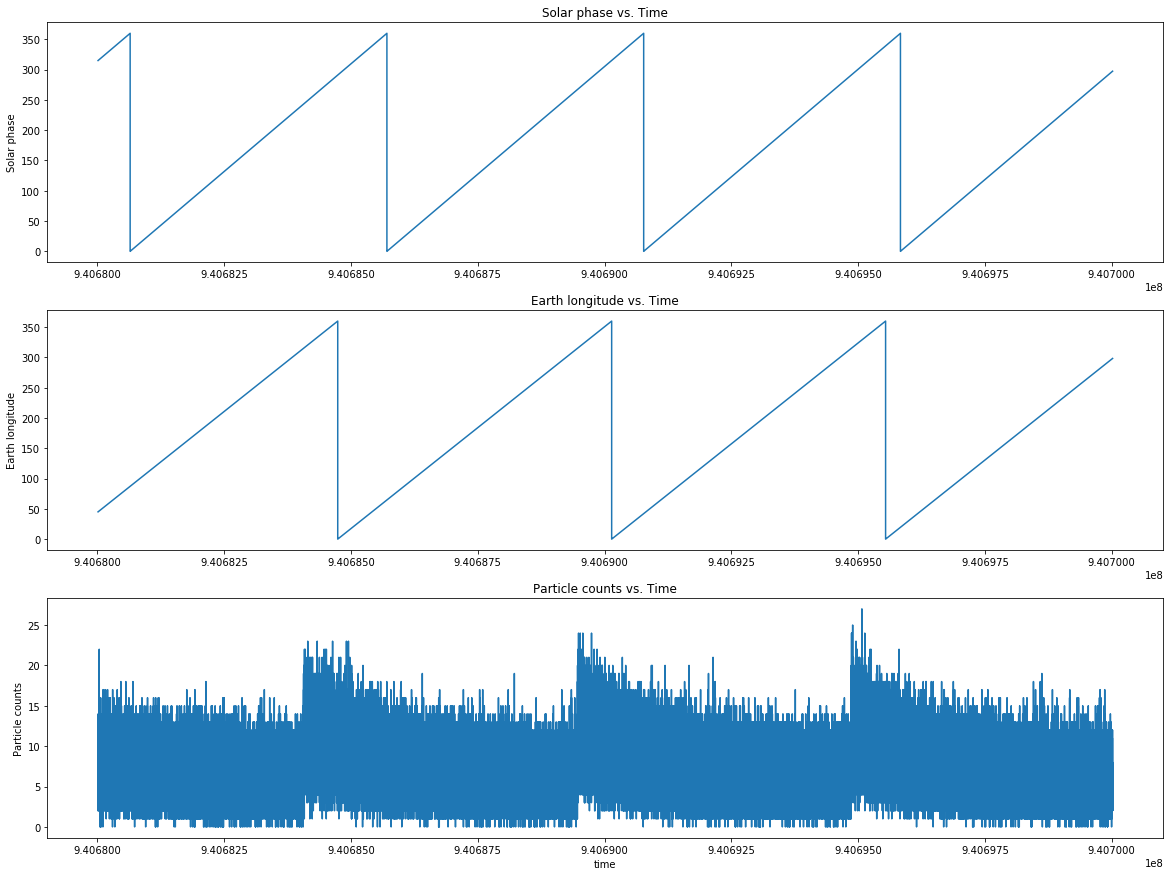

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(data[0, :200000], data[1, :200000])
ax1.set_title('Solar phase vs. Time')
ax1.set_ylabel('Solar phase')
ax2.plot(data[0, :200000], data[2, :200000])
ax2.set_title('Earth longitude vs. Time')
ax2.set_ylabel('Earth longitude')
ax3.plot(data[0, :200000], data[3, :200000])
ax3.set_title('Particle counts vs. Time')
ax3.set_ylabel('Particle counts')
ax3.set_xlabel('time')

The first graph above shows the position of the sun relative to the orbit within the time interval of the first 200000 100 miliseconds. The second graph represents the position of the spacecraft relative to the ground within the first 200000 100 miliseconds, and the third graph shows the particle counts over the same time interval as those two above. 

The solar phase and Earth longitude as we can see follow a highly similar pattern. They both are periodic functions from 0 to 360 degree, and they have a small phase difference between each other. From the particle counts graph, we can tell that it is also a periodic function. However, unlike the other two functions, particle counts function dose not have a clear and precise period.

More importantly, from the third graph above, we can see that most particle counts are lower than 25, but there one point in the graph where the number of particle is siginificantly greater than most of the data points. Therefore, we can conclude that there is likely signal contaminations in our data. 

Problem 1. 2)

As the background is not consistent across the dataset, we now will try to find the background distribution and describe how it is chnaging across the dataset. In order to describe the background pdf(), we first need to pick a distribution model to check. In our case, since our collected data is discrete within a time interval, we will be using a Poisson disrtibution to plot the background pdf().

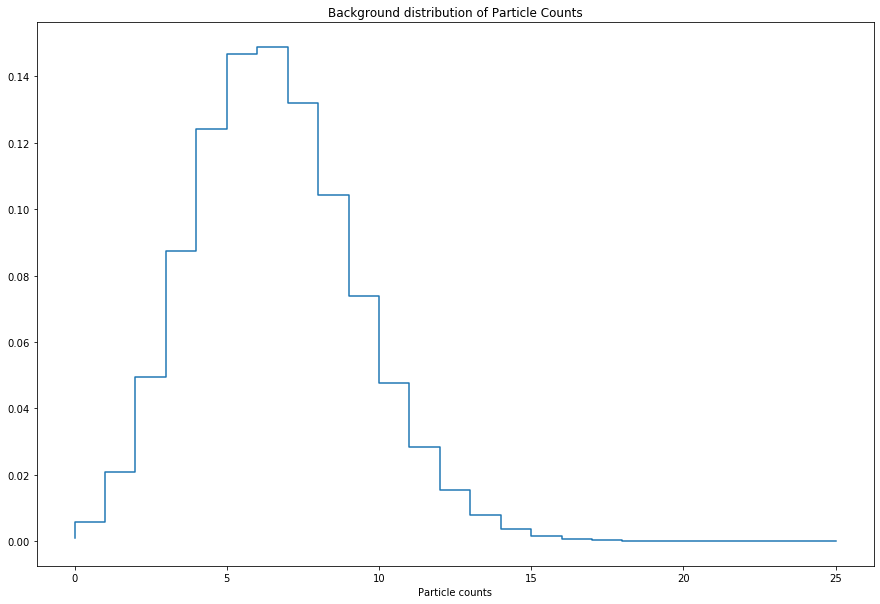

In [131]:
plt.rcParams["figure.figsize"] = (15,10)
mu = np.mean(data[3, :])
x=np.arange(0,26)
plt.step(x, stats.poisson.pmf(x,mu))
plt.title("Background distribution of Particle Counts")
plt.xlabel("Particle counts")
plt.show()

As the above graph shows, the data of particle counts is distributed as a Poisson distribution, and it has a mean of about 7. Its distribution like the graph shows will increase first and then decrease as it is orbiting around the low Earth orbit.

Problem 1. 3)

Now let's create a time-dependent model for the background and compare it with our model for the dataset. Since the particle counts function is periodic and the time needed to go around the orbit is 5400 seconds, we will compare our model with our data within the time period of 5400 seconds. 

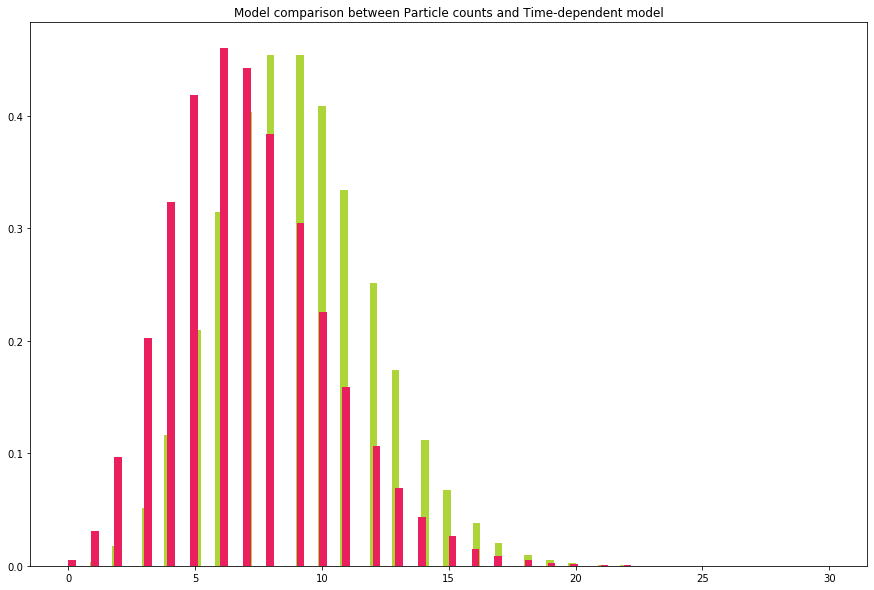

In [132]:
mu = np.mean(data[3, 5400])
d = stats.poisson.rvs(mu, size = 25000000)
plt.hist(d, 100, density=True, color = '#ADD439')
plt.hist(data[3, :], 100, density=True, color = '#EA205E')
plt.title("Model comparison between Particle counts and Time-dependent model")
plt.show()

In the above histograms, the red one represents our data within the first time interval of 5400 seconds and the green one is the model we created. We can see that they are both Poisson distributions, but in order to have a more clear comparison, we will plot this graph again but in log scale.

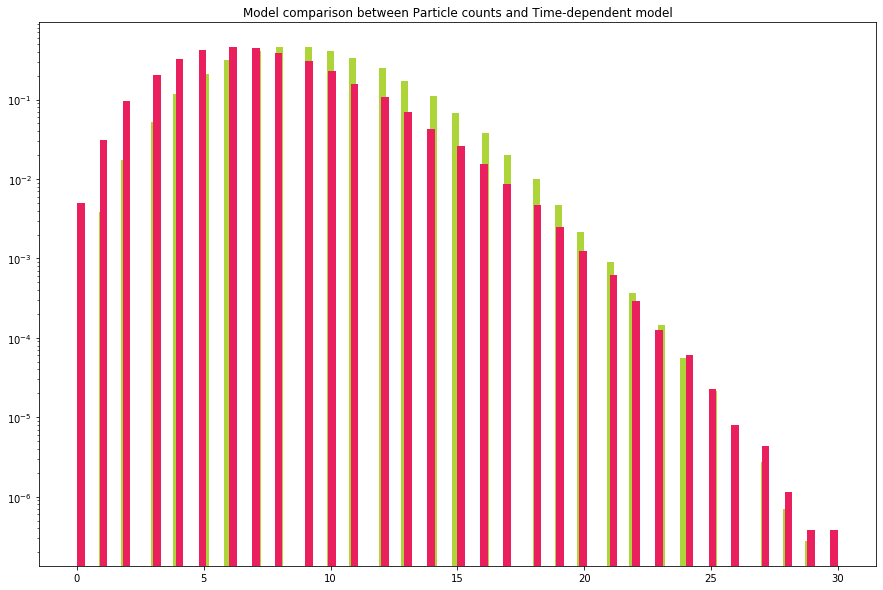

In [133]:
mu = np.mean(data[3, 5400])
d = stats.poisson.rvs(mu, size = 25000000)
plt.hist(d, 100, density=True, color = '#ADD439')
plt.hist(data[3, :], 100, density=True, color = '#EA205E')
plt.title("Model comparison between Particle counts and Time-dependent model")
plt.yscale('log')
plt.show()

From this graph, we can see that the Poisson disrtibution model we created does a great job describe the model of distribution of our data because, within one period of our data, most of the function is overlaped with the model we created.

Problem 1. 4)

Because the background is not constant, the discovery sensitivity threshold also varies, which means at different time, the number of particle we would see is different. Now let's calculate the '5-sigma' threshold for a 100 millisecond GRB at different times. We will calculate the '5-sigma' threshold at three different time interval by finding the mean value within each interval, and then calculating the '5-sigma value'.

In [134]:
sig = stats.norm.sf(5)
mu1 = np.mean(data[3, 1:5400])
thre1 = stats.poisson.isf(sig, mu1)
print(thre1)
mu2 = np.mean(data[3, 100000:200000])
thre2 = stats.poisson.isf(sig, mu2)
print(thre2)
mu3 = np.mean(data[3, 2499999:2500000])
thre3 = stats.poisson.isf(sig, mu3)
print(thre3)

25.0
24.0
26.0


Based on our results, we can see that, within the time interval from 1 to 5400 seconds, we need to detect 25 particles for a 100 miliseconds GRB in order to get 5 sigma, and during the interval of 100000 to 200000, we need a 24 particle-dectection to get 5 sigma. Within the interval 2499999 and 2500000, we will need to detect 26 particles.

Problem 2

For now, we will take a look at 10 telescope images and look for faintest stars signal.

Problem 2. 1)

Let us download the data first. It will be 10 images, each 200 pixels on a side.

In [135]:
hf = h5py.File('images.h5', 'r')
data2 = np.array(hf.get('imagestack'))
hf.close()

Problem 2. 2)

Now let us explore the data and try to whether there is any signal contamination and whether the signals background is time dependent and consistant spatially, and then, try to develop a plan to calculate your background pdf().

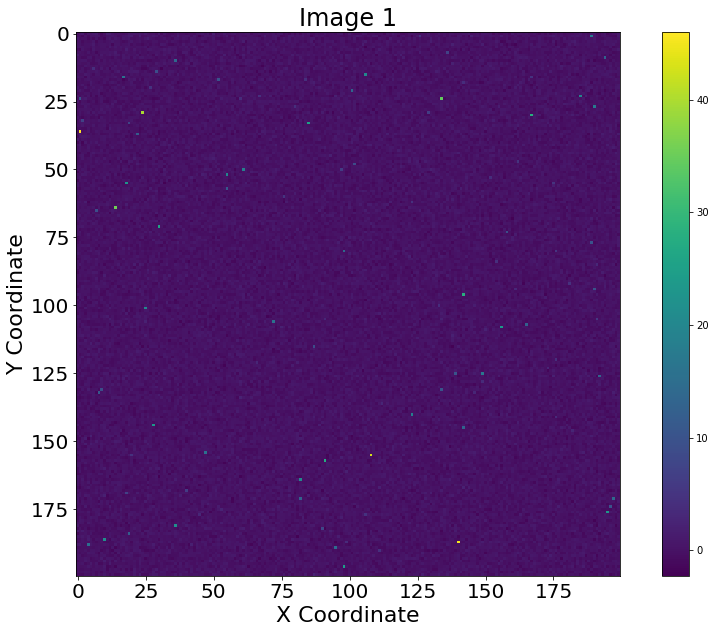

Text(0, 0.5, 'Y Coordinate')

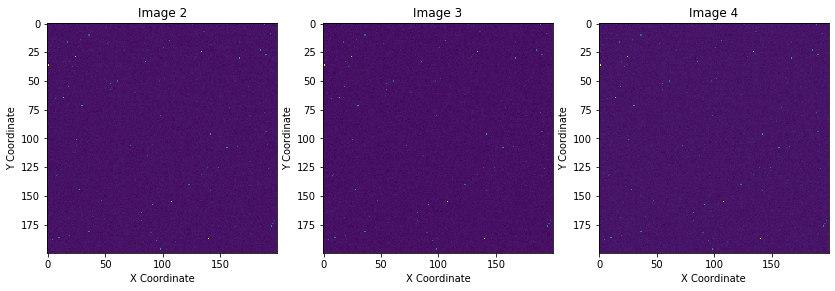

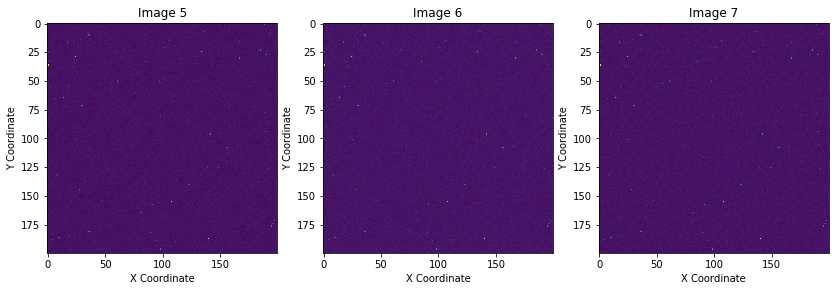

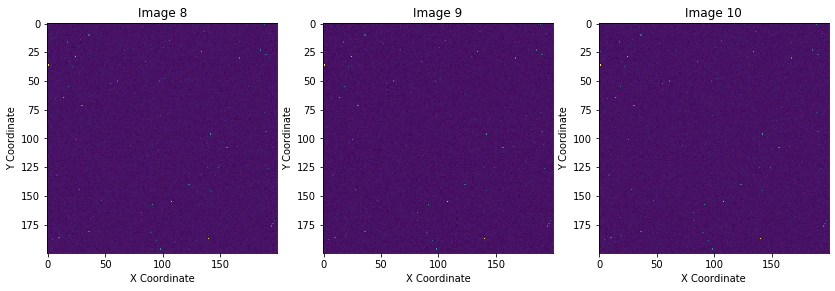

In [136]:
plt.title('Image 1', fontsize = 24)
plt.tick_params(labelsize = 20)
plt.xlabel('X Coordinate', fontsize = 22)
plt.ylabel('Y Coordinate', fontsize = 22)
plt.imshow(data2[:,:,0])
plt.colorbar()
plt.show()

plt.rcParams["figure.figsize"] = (14,14)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(data2[:,:,1])
ax1.set_title('Image 2')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax2.imshow(data2[:,:,2])
ax2.set_title('Image 3')
ax2.set_xlabel('X Coordinate')
ax2.set_ylabel('Y Coordinate')
ax3.imshow(data2[:,:,3])
ax3.set_title('Image 4')
ax3.set_xlabel('X Coordinate')
ax3.set_ylabel('Y Coordinate')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(data2[:,:,4])
ax1.set_title('Image 5')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax2.imshow(data2[:,:,5])
ax2.set_title('Image 6')
ax2.set_xlabel('X Coordinate')
ax2.set_ylabel('Y Coordinate')
ax3.imshow(data2[:,:,6])
ax3.set_title('Image 7')
ax3.set_xlabel('X Coordinate')
ax3.set_ylabel('Y Coordinate')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(data2[:,:,7])
ax1.set_title('Image 8')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax2.imshow(data2[:,:,8])
ax2.set_title('Image 9')
ax2.set_xlabel('X Coordinate')
ax2.set_ylabel('Y Coordinate')
ax3.imshow(data2[:,:,9])
ax3.set_title('Image 10')
ax3.set_xlabel('X Coordinate')
ax3.set_ylabel('Y Coordinate')


From the above images, there is no star that the brightness of it is significantly greater than all other stars in the images. Therefore, it is highly possible that there is no signal contamination in these data. There could be some stars that is extremely dark. Therefore, I would conclude taht the contamination of our signal is not visible. Furthermore, based on my inspection, the stars pattern did not change significantly as well. This means that the background pdf() is not time-dependent and it is consistant spatially. 
In order to calculate the background pdf(), I am planning on taking the average of the brightness of these 10 images.

In [ ]:
aver = []
for i in range(200):
    for j in range(200):
        for k in range(9):
            ave = np.mean(data2[i,j,k])
            aver.append(ave)

plt.hist(aver, bins = 'auto');
plt.xlim(-5,5);
plt.yscale('log')
plt.title('Histogram of Averaged Brightness')
plt.xlabel('Averge brightness',fontsize=15)

After we calculate the average brightness of the stars, we plot the histogram of our averaged brightness in a log scale and found that, except there are some outliers in the data, most of the data has a Gaussian distribution. 

Problem 2. 3)

And, now, we are going to hunt for thr faintest star by finding the value of '5-sigma' threshold in the average brightness of all the stars. If the average brightness is greater than the value of '5-sigma' we calculated, then we claim a discovery. We do this by first find the mean and standard deviation of our distribution and then calculate the probability of '5-sigma'.

In [128]:
mean = np.mean(aver)
std = np.std(aver)
prob = stats.norm.sf(5)
fain = stats.norm.isf(prob, loc=mean, scale=std)
print('The brightness needs to be',fain, "for a faintest star.")

The brightness needs to be 4.986617601707383 for a faintest star.


Based on our calculation, we found that we have to detect a brightness greater than 4.99 in order to claim a discovery of faintest star. Now we will compare our data with the result we got to see how many faintest star we have discovered.

In [129]:
n = np.sum(aver > fain)
print("In our data, there are total", n, "faintest star discovered.")

In our data, there are total 665 faintest star discovered.


Problem 2. 4)

In this part, me and my partner were working on the same set of data. However, our resulting background pdf()s are totally different. This may because we are looking for two different types of data. For me, I was trying to figure out the discovery of faintest star. Therefore, I will need to take the averge of the brightness of the star in these 10 images and use that to create my pdf(). But, for my partner, he was looking for star that is super bright and only appear on one image. Therefore, what he needs to do is to compare all 10 images and find the star that is both bright and rare.

